In [1]:
import tensorflow as tf
from collections import deque
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
import joblib
from glob import glob
from google.colab.patches import cv2_imshow

In [2]:
model=joblib.load("/content/drive/MyDrive/Isro_project/Model/Model.sav")
lb=joblib.load("/content/drive/MyDrive/Isro_project/Model/lblbinarizer")
mean=np.array([128.68,116.779,103.939][::1],dtype="float32")
outputvideo="/content/drive/MyDrive/Isro_project/demo.avi"
Queue=deque(maxlen=128)

1/1 [==============================] - 0s 197ms/step


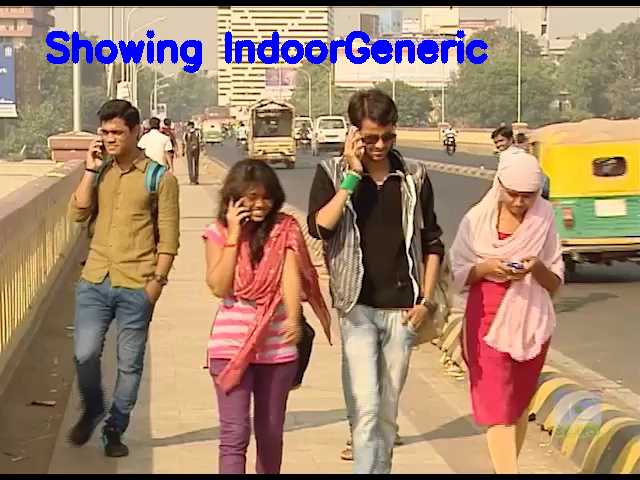

1/1 [==============================] - 0s 212ms/step


In [6]:
capture_video= cv2.VideoCapture("/content/drive/MyDrive/Isro_project/5333232.mp4")
writer=None
(Width,Height)=(None,None)

while True:
    (taken,frame)=capture_video.read()
    if not taken:
        break
    if Width is None or Height is None:
        (Width,Height)=frame.shape[:2]
    output=frame.copy()
    frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    frame=cv2.resize(frame,(224,224)).astype("float32")
    frame-=mean
    pread=model.predict(np.expand_dims(frame,axis=0))[0]
    Queue.append(pread)
    results=np.array(Queue).mean(axis=0)
    i=np.argmax(results)
    label=lb.classes_[i]
    text=f"Showing {label}"
    cv2.putText(output,text,(45,60),cv2.FONT_HERSHEY_SIMPLEX,1.25,(255,0,0),5)
    if writer is None:
        fourcc=cv2.VideoWriter_fourcc(*"HJPG")
        writer=cv2.VideoWriter("outputvideo",fourcc,30,(Width, Height),True)
        writer.write(output)
        cv2_imshow(output)
        key=cv2.waitKey(1)&0xFF
        if key ==ord("q"):
            break

    writer.release()
capture_video.release()

1/1 [==============================] - 2s 2s/step


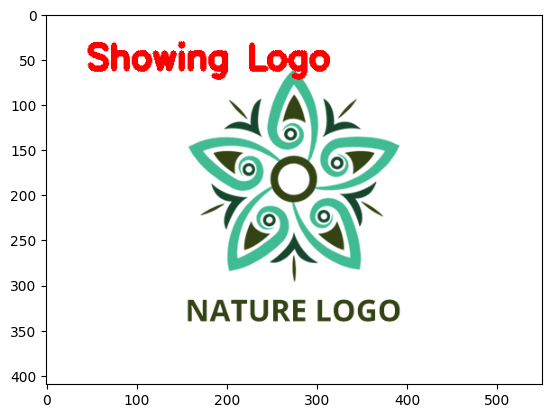

1/1 [==============================] - 0s 196ms/step


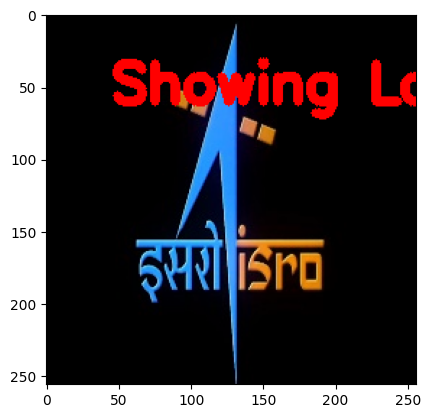

1/1 [==============================] - 0s 201ms/step


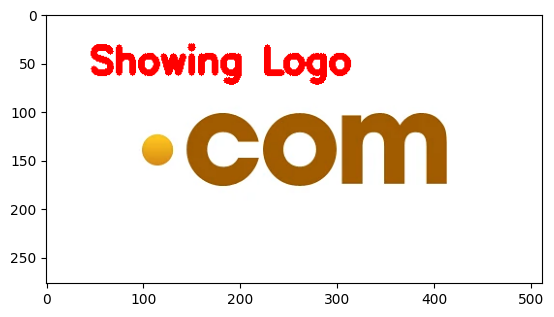

In [3]:
test_path=glob("/content/drive/MyDrive/Colab Notebooks/Testing/*.jpg")
writer=None
(Width,Height)=(None,None)
if test_path:
    for img in test_path:
        image=cv2.imread(img)
        if Width is None or Height is None:
            (Width,Height)=image.shape[:2]
        output=image.copy()
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image=cv2.resize(image,(224,224)).astype("float32")
        image-=mean
        pread=model.predict(np.expand_dims(image,axis=0))[0]
        Queue.append(pread)
        results=np.array(Queue).mean(axis=0)
        i=np.argmax(results)
        label=lb.classes_[i]
        text=f"Showing {label}"
        cv2.putText(output,text,(45,60),cv2.FONT_HERSHEY_SIMPLEX,1.25,(255,0,0),5)
        plt.imshow(output)
        plt.show()